<a href="https://colab.research.google.com/github/choi-danbi/Deeplearning-for-everyone/blob/main/(250220)10%EA%B0%95_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [폐암 수술 환자의 생존율 예측하기]


In [1]:
#텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러온다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#데이터를 다루는 데 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

#데이터 다운
!git clone https://github.com/taehojo/data.git

#데이터 불러오기
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")

X = Data_set[:,0:16]
y = Data_set[:,16]

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 3.86 MiB/s, done.
Resolving deltas: 100% (9/9), done.


1. Sequential()함수   
은닉층은 Sequential()함수를 통해 쉽게 구현된다.  
Sequential 함수를 model로 선언해 놓고, model.add()라는 라인을 추가하면 새로운 층이 만들어진다.  

2. 은닉층과 출력층  
밑의 코드에는 model.add()로 시작되는 라인이 두 개 있으니, 즉 층을 두개 가진 모델을 만든것이다. 맨 마지막 층은 출력층이기 때문에 지금 만들어진 두개의 층은 각각 은닉층과 출력층을 의미한다.

3. model.add(Dense(30, input_dim = 16))  
새로운 층을 만들고 나면 Dense()함수의 첫번째 인자에 만들 노드 개수를 적어준다.  
이때 노드는 '가중합'에 해당하는것이다. 또한 input_dim은 입력 데이터에서 몇개의 값을 가져올지 정하는것이다.  
즉, 이 코드에서는 데이터에서 값을 16개 받아 은닉층의 노드 30개로 보낸다는 의미이다.

4. model.add(Dense(1, activation='sigmoid'))  
출력층에 해당하므로 출력값을 하나로 정해서 보여줘야하기 때문에 출력층의 노드 수는 한 개이다.  
또한 이 노드에서 입력받은 값은 활성화 함수를 거쳐 최종 출력값으로 나와야하므로 활성화 함수로 sigmoid를 활용했다.

In [2]:
#딥러닝 모델 구조 결정
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. loss  
먼저 오차함수를 선택해야한다.  
폐암 수술 환자의 생존율 예측은 생존과 사망, 둘 중 하나를 예측하기 때문에 binary_crossentropy를 선택했다.
2. 그 외  
현재 가장 많이 쓰는 옵티마이저는 adam이다. 또한 metrics()함수는 모델이 컴파일될 때 모델 수행의 결과를 나타내게끔 설정하는 부분이다.  
여기서 accuracy라고 설정한것은 학습셋에 대한 정확도에 기반해 결과를 출력하라는 의미이다.

In [3]:
#딥러닝 모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1641 - loss: 5.1273
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8358 - loss: 0.7373
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8177 - loss: 0.6434
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8233 - loss: 0.5057
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.4092


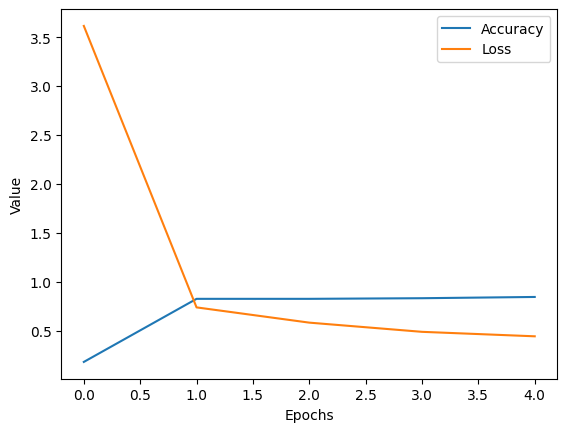

In [4]:
# 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()